In [85]:
import numpy as np
import copy
from matplotlib import pyplot as plt
from math import hypot
import pandas as pd

"""후진대입법"""
def backSubstitution(U, b):
    (m, m) = U.shape
    x = np.zeros((m, 1), np.float)
    for j in range(m - 1, -1, -1):
        x[j] = (b[j] - np.matmul(U[j, j + 1:], x[j + 1:])) / U[j, j]
    return x



"""AL3.1"""

def clgs(A):
    (m, n) = A.shape
    V = copy.deepcopy(A)
    V = np.mat(V, np.float)
    Q = np.mat(np.eye(m,n))
    R = np.mat(np.zeros((n, n)))

    for j in range (0, n):
        for i in range (0, j):
            R[i, j] = (Q[:, i].T).dot(A[:, j])
            V[:, j] = V[:, j]-R[i, j]*Q[:, i]

        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j]/R[j, j]

    return [Q, R]

"""AL3.2"""

def mgs(A):
    (m, n) = A.shape
    Q = copy.deepcopy(A)
    Q = np.mat(Q, np.float)
    R = np.mat(np.zeros((n, n)))

    for i in range (0, n-1):
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] = Q[:, i]/R[i, i]
        R[i, i+1:n] = (Q[:, i].T).dot(Q[:, i+1:n])
        Q[:, i+1:n] = Q[:, i+1:n] - (Q[:, i]).dot(R[i, i+1:n])

    R[n-1, n-1] = np.linalg.norm(Q[:, n-1])
    Q[:, n-1] = Q[:, n-1]/R[n-1, n-1]

    return [Q, R]

"""AL3.3"""

def qrhouse(A):
    (m, n) = A.shape
    R = copy.deepcopy(A)
    R = np.mat(R, np.float)
    V = np.mat(np.zeros((m, n)))

    for k in range (0, min(m-1, n)):
        x = R[k:m, k]
        v = x + np.linalg.norm(x) * np.mat(np.eye(len(x), 1)) * np.sign(x[0])
        V[k:m, k] = v
        R[k:m, k:n] = R[k:m, k:n]-(2*v).dot(((v.T).dot(R[k:m, k:n]))/((v.T).dot(v)))

    R = np.triu(R[0:n, 0:n])

    return [V, R]

def formQ(V):
    (m, n) = V.shape
    Q = np.mat(np.eye(m, n))
    for j in range (min(m-2, n-1), -1, -1):
        v = V[:, j]
        Q = Q-(2*v).dot(((v.T).dot(Q))/((v.T).dot(v)))

    return Q



Qc is
[[ 0.14814966 -0.16896581 -0.07702386 ... -0.03684206  0.10007237
   0.08327493]
 [ 0.00860817 -0.15042727  0.13166739 ... -0.04472969  0.11205841
   0.09931055]
 [-0.0958221  -0.05824115 -0.00371905 ... -0.13830418  0.07525801
   0.09277953]
 ...
 [ 0.00200163  0.19003861 -0.07008651 ...  0.04955067 -0.05965807
  -0.0602056 ]
 [ 0.1647481   0.08816341  0.15062816 ... -0.10311815  0.12490413
   0.11820395]
 [-0.16138165  0.19573569 -0.12270035 ... -0.20558289  0.1795752
   0.19132195]]
Rc is
[[ 2.20247227e-02 -3.92693703e-02 -2.89146551e-02 ... -5.33017521e-02
   8.02737667e-03  1.45780232e-02]
 [ 0.00000000e+00  8.05025956e-02  4.09461209e-02 ...  7.00166602e-02
  -3.16476604e-02  2.42542770e-02]
 [ 0.00000000e+00  0.00000000e+00  2.40919928e-02 ...  1.26777890e-02
   4.61431437e-03 -2.09439966e-02]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.70515726e-07
   2.56832732e-09  8.19701593e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  

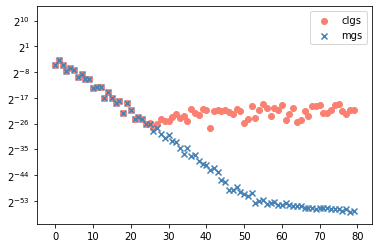

In [86]:
"""3.2 (a)"""
[U, X] = qrhouse(np.random.randn(80, 80))
U = formQ(U)
[V, X] = qrhouse(np.random.randn(80, 80))
V = formQ(V)

J = np.arange(1, 81, 1)
S = np.mat(np.diag(2.**(-J)))
A_1 = U*S*V

[Qc, Rc] = clgs(A_1)
[Qm, Rm] = mgs(A_1)

print('Qc is')
print(Qc)
print('Rc is')
print(Rc)
print('Qm is')
print(Qm)
print('Rm is')
print(Rm)


"""Draw scatter plot"""

Rcjj = np.array(Rc[0, 0], np.float)
axisX = np.arange(0, 80, 1)
for j in range (1, 80):
    Rcjj = np.append(Rcjj, Rc[j, j])

fig, ax = plt.subplots()
plt.semilogy(basey = 2)

ax.scatter(axisX, Rcjj, marker = 'o', color = 'salmon', label='clgs')


Rmjj = np.array(Rm[0, 0], np.float)
axisX = np.arange(0, 80, 1)
for j in range (1, 80):
    Rmjj = np.append(Rmjj, Rm[j, j])

ax.scatter(axisX, Rmjj, marker = 'x', color = 'steelblue', label='mgs')

ax.legend(loc='best')
plt.show()

In [87]:
"""(b)"""
A_2 = np.mat([[0.70000, 0.70711], [0.70001, 0.70711]])
[Qm_2, Rm_2] = mgs(A_2)
[V_2, R_2] = qrhouse(A_2)
Q_2 = formQ(A_2)

print("householder")
print(np.linalg.norm((Q_2.T).dot(Q_2 - np.eye(2))))

print("mgs")
print(np.linalg.norm((Qm_2.T).dot(Qm_2 - np.eye(2))))

"""하우스홀더가 더 numerically stable하다."""

householder
1.9999999999999998
mgs
1.9999999999755893


'하우스홀더가 더 numerically stable하다.'

In [88]:
"""3.3 """
def qrGivens(A):
    (m, n) = A.shape

    Q = np.mat(np.eye(m))
    R = copy.deepcopy(A)

    (rows, cols) = np.tril_indices(m, -1, n)
    for (row, col) in zip(rows, cols):
        if R[row, col] != 0:
            r = hypot(R[col, col], R[row, col])
            c = R[col, col] / r
            s = -R[row, col] / r

            Givens = np.mat(np.eye(m))
            Givens[[col, row], [col, row]] = c
            Givens[row, col] = s
            Givens[col, row] = -s

            R = np.dot(Givens, R)
            Q = np.dot(Q, Givens.T)
    Q = -Q[0:m, 0:n]
    R = -R[0:n, 0:n]
    return [Q, R]


"""test"""
A = np.mat([[5, 9, 2],[4, 9, 7],[4, -2, 10], [5, 1, 10], [-2, 5, 4]])
"""my Givens Rotation"""
[Q, R] = qrGivens(A)
print('Givens Rotation')
print(Q)
print(R)

"""matlab(python) qr"""
[Q2, R2] = np.linalg.qr(A)
print('matlab(python) qr')
print(Q2)
print(R2)

"""둘이 거의 비슷하다."""

Givens Rotation
[[-0.53916387 -0.42922608  0.48003059]
 [-0.43133109 -0.4964781  -0.15712613]
 [-0.43133109  0.43911609 -0.42429232]
 [-0.53916387  0.25120605 -0.2919202 ]
 [ 0.21566555 -0.55977411 -0.69256092]]
[[-9.27361850e+00 -7.33262858e+00 -1.29399328e+01]
 [-0.00000000e+00 -1.17572343e+01  3.30326064e-01]
 [-0.00000000e+00  2.13306175e-16 -1.00721906e+01]]
matlab(python) qr
[[-0.53916387 -0.42922608  0.48003059]
 [-0.43133109 -0.4964781  -0.15712613]
 [-0.43133109  0.43911609 -0.42429232]
 [-0.53916387  0.25120605 -0.2919202 ]
 [ 0.21566555 -0.55977411 -0.69256092]]
[[ -9.2736185   -7.33262858 -12.93993278]
 [  0.         -11.75723429   0.33032606]
 [  0.           0.         -10.07219064]]


'둘이 거의 비슷하다.'

In [89]:
"""4-3을 위해 만든 함수들"""
def makeMatrixM(m, type=0):
    A = np.random.randn(m, m)/np.sqrt(m)
    if type == 1:
        A = np.triu(A)
    return A

def makePlotForM(numberOfMatrix, type=0):
    setn = np.arange(3, numberOfMatrix+3)
    setM = 2 ** setn
    normBox = np.array([])

    fig, ax = plt.subplots()
    for i in setn:
        A = makeMatrixM(setM[i-3], type)
        nidx = np.full(2**i, 2**i)
        [Ramda, S] = np.linalg.eig(A)
        (m, n) = A.shape
        ax.set_xscale('log', basex = 2)
        ax.scatter(nidx, Ramda, marker = '^', label = '2^' + str(i))
    plt.xlim(4, 2**(numberOfMatrix+4))
    plt.legend(loc = 'best')
    plt.show()

def getRadiusWithNorm2(m, type=0):
    A = makeMatrixM(m, type)
    [Ramda, S] = np.linalg.eig(A)
    Radius = np.max(Ramda)
    Norm2 = np.linalg.norm(A, 2)
    return [Radius, Norm2]

def getConditionN(m, type=0):
    A = makeMatrixM(m, type)
    [U, s, Vt] = np.linalg.svd(A)
    ConditionN = s[m-1]
    return ConditionN

def getProbability(m, type=0):
    axisXvalue = np.arange(1, m+1)
    YcondiN = np.array([])
    labels = np.array([])
    for i in axisXvalue:
        condi = getConditionN(i, type)
        YcondiN = np.append(YcondiN, condi)
        labelValue = 0
        for j in range(0, 100):
            if condi < 2. ** (-j):
                labelValue = j
            else:
                break
        labels = np.append(labels, labelValue)

    dataF = pd.DataFrame({'exponent' : axisXvalue, 'condition_number' : YcondiN, 'label' : labels})
    fig, ax = plt.subplots()

    k = 0
    while 2.**(-k)>np.min(YcondiN):
        k=k+1
        if k == 100:
            print("error! you may make mistake")
            break

    for j in range(0, k+1):
        X = dataF[dataF['label'] == j]['exponent']
        Y = dataF[dataF['label'] == j]['condition_number']
        ax.scatter(X, Y, marker='o', label='2^-' + str(j))
    plt.legend(loc = 'best')
    ax.set_yscale('log', basey=2)
    plt.show()

    prop = np.array([])
    for l in range (0, k+1):
        prop = np.append(prop, len(dataF[dataF['label'] == l])/m)
    Probablity = pd.DataFrame({'prob' : prop})

    return Probablity

def getProbabilityOfsizeM(m, type = 0):
    setCondi = np.array([])
    setLabel = list()
    setProbability = np.array([])
    for i in range (0, 100):
        setCondi = np.append(setCondi, getConditionN(m, type))

    maxEx = 1000
    for i in range (0, 100):
        for j in range (0, maxEx):
            if setCondi[i] < 2. ** (-j):
                labelValue = j
            else:
                break

        setLabel.append(labelValue)

    maxEx = int(max(setLabel))

    for i in range (0, maxEx+1):
        totalNumI = 0
        for j in range (i, maxEx):
            totalNumI = totalNumI+setLabel.count(j)
        #print(totalNumI)
        setProbability = np.append(setProbability, totalNumI)
    setProbability = setProbability/100
    print(setProbability)
    
    xIdx = 0.5**np.array(range(0, maxEx+1))
    fig, ax = plt.subplots()
    plt.plot(setProbability)
    plt.ylim(0, 1)
    ax.set_xscale('log', basex=2)
    plt.show()

C:\Users\gisung\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


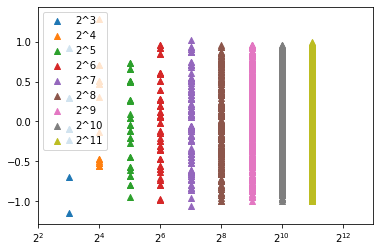

'2^100은 돌아가지 않아서 2^11까지만 하였습니다.'

In [90]:
"""4_3_a"""


makePlotForM(9)
"""문제 조건대로 만든랜덤 행렬A의 eigenvalues는 -1에서 1사이에 대부분 존재한다."""
"""spectral radius는 eigenvalues의 최댓값으로 점점 1에 수렴한다"""
"""2^100은 돌아가지 않아서 2^11까지만 하였습니다."""

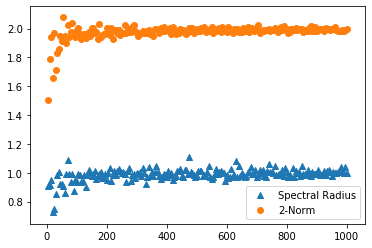

마지막 1000번째 값 실제로 확인
(1.016219422858035-0.14281635265819462j)


'따라서 m이 증가하더라도 등식에 가까워지지는 않는다.'

In [91]:
"""4_3_b"""
setOfRadius = np.array([])
setOfNorm2 = np.array([])
nidx = np.array(range(5, 1001, 5))
for i in range (5, 1001, 5):
    setOfRadius = np.append(setOfRadius, getRadiusWithNorm2(i)[0])
    setOfNorm2 = np.append(setOfNorm2, getRadiusWithNorm2(i)[1])


fig, ax = plt.subplots()
ax.scatter(nidx, setOfRadius, marker = '^', label = 'Spectral Radius')
ax.scatter(nidx, setOfNorm2, marker = 'o', label = '2-Norm')
plt.legend(loc = 'best')
plt.show()

print('마지막 1000번째 값 실제로 확인')
print(getRadiusWithNorm2(1000)[1] - getRadiusWithNorm2(1000)[0])
"""spectral radius는 1로 수렴하는 반면 2-norm은 2로 수렴한다."""
"""따라서 m이 증가하더라도 등식에 가까워지지는 않는다."""

when m = 100
[0.99 0.99 0.99 0.99 0.99 0.99 0.92 0.59 0.26 0.17 0.06 0.03 0.   0.  ]


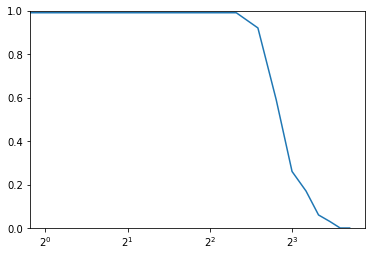

when m = 500
[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.97 0.71 0.41 0.19 0.1  0.03
 0.   0.  ]


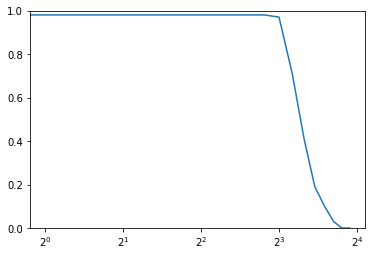

when m = 1000
[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.95 0.75 0.39 0.19 0.07
 0.03 0.  ]


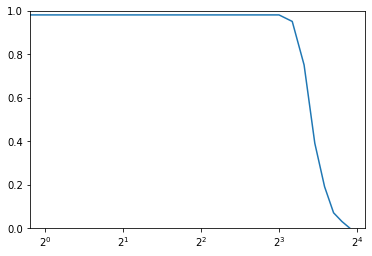

위의 m=100, 500, 1000 그래프를 통해 우리는 m이 커지더라도 해당 누적확률그래프의 tail이 유사한 모습을 그림을 알 수 있다.


In [93]:
"""4_3_c"""
print('when m = 100')
getProbabilityOfsizeM(100)
print('when m = 500')
getProbabilityOfsizeM(500)
print('when m = 1000')
getProbabilityOfsizeM(1000)

print('위의 m=100, 500, 1000 그래프를 통해 우리는 m이 커지더라도 해당 누적확률그래프의 tail이 유사한 모습을 그림을 알 수 있다.')



a-2


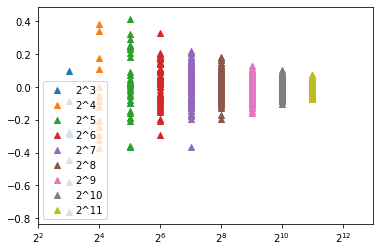

m이 커질수록 eigenvalue가 모두 0에 수렴하는 모습을 보인다
b-2


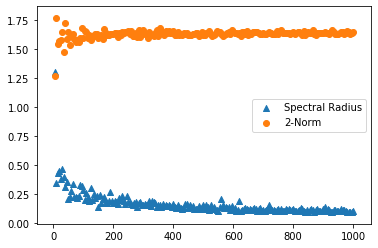

마지막 1000번째 값 실제로 확인
1.5092753305050937
spectral radius는 0으로 수렴하는 반면 2-norm은 1.6으로 수렴한다. 따라서 m이 증가하더라도 등식에 가까워지지는 않는다.
c-2
when m = 100
[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.55 0.31 0.26 0.06 0.02
 0.  ]


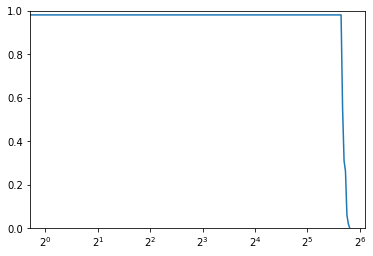

when m = 500
[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.31 0.13
 0.04 0.03 0.02 0.   0.   0.  ]


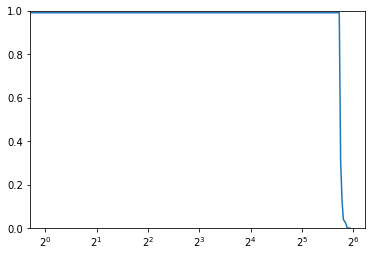

when m = 1000
[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.54 0.35
 0.1  0.07 0.04 0.   0.   0.   0.   0.   0.  ]


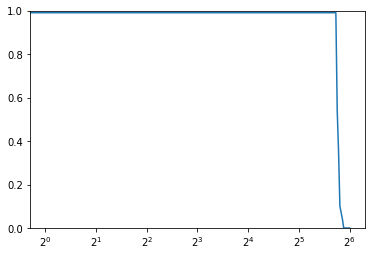

위의 m=100, 500, 1000 그래프를 통해 우리는 m이 커지더라도 해당 누적확률그래프의 tail이 유사한 모습을 그림을 알 수 있다.


In [97]:
"""4_3_d"""
"""모든 함수에 type 인자로 1을 넣으면 상삼각행렬로 과정을 수행한다."""

print('a-2')
"""4_3_a-2"""
makePlotForM(9, 1)
print('m이 커질수록 eigenvalue가 모두 0에 수렴하는 모습을 보인다')


print('b-2')
"""4_3_b 상삼각 버전. 모든 함수에 type 인자로 1을 넣는다."""
setOfRadius = np.array([])
setOfNorm2 = np.array([])
nidx = np.array(range(5, 1001, 5))
for i in range (5, 1001, 5):
    setOfRadius = np.append(setOfRadius, getRadiusWithNorm2(i, 1)[0])
    setOfNorm2 = np.append(setOfNorm2, getRadiusWithNorm2(i, 1)[1])


fig, ax = plt.subplots()
ax.scatter(nidx, setOfRadius, marker = '^', label = 'Spectral Radius')
ax.scatter(nidx, setOfNorm2, marker = 'o', label = '2-Norm')
plt.legend(loc = 'best')
plt.show()

print('마지막 1000번째 값 실제로 확인')
print(getRadiusWithNorm2(1000, 1)[1] - getRadiusWithNorm2(1000, 1)[0])
print('spectral radius는 0으로 수렴하는 반면 2-norm은 1.6으로 수렴한다. 따라서 m이 증가하더라도 등식에 가까워지지는 않는다.')


print('c-2')
"""4_3_c-2"""
print('when m = 100')
getProbabilityOfsizeM(100,1)
print('when m = 500')
getProbabilityOfsizeM(500,1)
print('when m = 1000')
getProbabilityOfsizeM(1000,1)

print('위의 m=100, 500, 1000 그래프를 통해 우리는 m이 커지더라도 해당 누적확률그래프의 tail이 유사한 모습을 그림을 알 수 있다.')


In [98]:
"""4_6 준비"""


"""t만들기"""
t = np.linspace(0, 1, 50)

"""A만들기"""
A = np.vander(t)
A = np.fliplr(A)[:, 0:12]
"""b만들기"""
b = np.mat(np.cos(4*t))
b = np.transpose(b)


In [99]:
"""4_6_a"""
"""Ax = b -> A'Ax = A'b -> x = (A'A)^-1*A'b using mgs"""
normalA = np.matmul(A.T, A)
x_a = np.matmul(np.matmul(np.linalg.inv(normalA), A.T), b)
print(x_a)

[[ 0.99206055]
 [ 0.10413854]
 [-8.20566828]
 [ 0.25596783]
 [ 9.92738529]
 [ 1.37338835]
 [-6.89312611]
 [ 0.43127955]
 [ 1.75216836]
 [-0.15873205]
 [-0.28984775]
 [ 0.07115099]]


In [100]:
"""4_6_b"""
"""Ax = b -> QRx = b -> Rx = Q'b -> """
[Q, R] = mgs(A)

Qtb = np.matmul(Q.T, b)
x_b = backSubstitution(R, Qtb)
print(x_b)

[[ 1.00000000e+00]
 [-7.80741849e-07]
 [-7.99996781e+00]
 [-5.16377008e-04]
 [ 1.06709431e+01]
 [-2.06445282e-02]
 [-5.62772565e+00]
 [-1.10758970e-01]
 [ 1.73549472e+00]
 [-2.48104577e-02]
 [-3.61374792e-01]
 [ 8.57179143e-02]]


In [101]:
"""4_6_c"""
"""Ax = b -> A'Ax = A'b -> x = (A'A)^-1*A'b using qrhouse"""
[V, R] = qrhouse(A)
Q = formQ(V)

Qtb = np.matmul(Q.T, b)
x_c = backSubstitution(R, Qtb)
print(x_c)

[[ 1.00000000e+00]
 [-4.22743051e-07]
 [-7.99998124e+00]
 [-3.18763232e-04]
 [ 1.06694308e+01]
 [-1.38202878e-02]
 [-5.64707563e+00]
 [-7.53160223e-02]
 [ 1.69360696e+00]
 [ 6.03211103e-03]
 [-3.74241704e-01]
 [ 8.80405763e-02]]


In [102]:
"""4_6_d"""
"""Ax = b -> A'Ax = A'b -> x = (A'A)^-1*A'b using qr"""
[Q, R] = np.linalg.qr(A)

Qtb = np.matmul(Q.T, b)
x_d = backSubstitution(R, Qtb)
print(x_d)

[[ 1.00000000e+00]
 [-4.22742764e-07]
 [-7.99998124e+00]
 [-3.18763193e-04]
 [ 1.06694308e+01]
 [-1.38202872e-02]
 [-5.64707563e+00]
 [-7.53160213e-02]
 [ 1.69360696e+00]
 [ 6.03211095e-03]
 [-3.74241704e-01]
 [ 8.80405762e-02]]


In [103]:
"""4_6_f"""
"""Ax = b -> UsV'x = b -> sx = U'bV -> x = U'bV/s"""
[U, s, Vt] = np.linalg.svd(A)
Utb = np.matmul(U.T, b)
Vtx = backSubstitution(np.diag(s), Utb)
x_f = Vt.T.dot(Vtx)
print(x_f)

[[ 1.00000000e+00]
 [-4.22742784e-07]
 [-7.99998124e+00]
 [-3.18763201e-04]
 [ 1.06694308e+01]
 [-1.38202874e-02]
 [-5.64707563e+00]
 [-7.53160220e-02]
 [ 1.69360696e+00]
 [ 6.03211053e-03]
 [-3.74241704e-01]
 [ 8.80405762e-02]]


In [104]:
"""4_6_g"""
print(type(x_a[0, 0]))
print(type(x_b[0, 0]))
print(type(x_c[0, 0]))
print(type(x_d[0, 0]))
print(type(x_f[0, 0]))

print("파이썬에 long type이 없어서 float64를 사용했습니다.")

print('\033[31m'+str(x_a))
"""normal equations은 다른것과 비교할때 불안정하다."""

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
파이썬에 long type이 없어서 float64를 사용했습니다.
[[ 0.99206055]
 [ 0.10413854]
 [-8.20566828]
 [ 0.25596783]
 [ 9.92738529]
 [ 1.37338835]
 [-6.89312611]
 [ 0.43127955]
 [ 1.75216836]
 [-0.15873205]
 [-0.28984775]
 [ 0.07115099]]


'normal equations은 다른것과 비교할때 불안정하다.'